# Implementing paper: Rain or Snow Detection in Image Sequences Through Use of a Histogram of Orientation Streaks

2011

## Below is the implementation of the math from section 2.1


In [ ]:
import numpy as np
import cv2

#rain parameters
a=1   #size of a rain drop in mm anything between 0.5 and 5 mm (for hailstone 10-40mm)
rho=30  #rain density anything under 305 mm/hour or 38mm/min
v=200*np.sqrt(a) #maybe velocity: 2-10 m/s (for hailstone 10-20m/s)

#camera parameters
f=35  #camera focal length 10-1200mm
N=2.8 #F-Number between f/1.4–f/22
Te = 0.5 #exposure time 1/16000-1s
Lb = 500 #background brightness 0.0001 - 100.000
Lr = 750 #rain brightness
fpixel = f*0.5 #focal length in pixels
#mixed parameters
Zm = 2*fpixel*a #the distance after which rain becomes fog for a camera
z = 20 #distance of rain drop from camera
#rain visible region 0<z<R*Zm where R is a constant
#R depends on the brightness of the scene and camera sensitivity

def G(f,N):
    return f*N

vr_aprox = (a * 2 * np.sqrt(rho) / np.sqrt(v))*(Lr-Lb)*((np.sqrt( G(f,N) ) ) / np.sqrt(Te) )
print vr_aprox



## Section 2.2

Each pixel of the image is modelled  by a mixture of K Gaussian distributions.


In [16]:


K = 100 # munber of Gaussian distributions for each pixel
Time = 30 #time = the sum of all available pictures that will be analyzed
total_Pixels = 640*480

P = [[0 for x in range(total_Pixels)] for y in range(t)] # our actual images collected as a array of pixel for each timestamp
omega = [[0 for x in range(K)] for y in range(t)]
mu = [[0 for x in range(K)] for y in range(t)]
sigma = [[0 for x in range(K)] for y in range(t)]
M = [[0 for x in range(K)] for y in range(t)]
#initialize M as such: M[k,t] = 1 if omega[k] is the first matched component, 0 otherwise
X = [for y in range(t)]

#mu is the mean, sigma is the standard deviation of the kth gaussian component, X is a pixel at time t
def Gaussian_N(X,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.e^((-1/2)*(sigma^(-2))*(X-mu)^2)

T = 0.3 #minimum prior probability of observing a background pixel
gamma_1 = 0.001 #decay factor
change_factor = 1/gamma_1 #time constant which determines change
b = 5 # b < K a subset of the total gaussian distributions used as a model of the scene background
B = [[0 for x in range(total_Pixels)] for y in range(b)] #this will be our background
F = [[0 for x in range(total_Pixels)] for y in range(t)] #these will be our foregrounds of movement


#for one timestamp
for t in range(Time):
    #for one pixel
    for i in range(total_Pixels):
        
        temp_sum = 0
        #for one Gaussian distribution
        for k in range(K):
            temp_sum += omega[k][t]*Gaussian_N(P[i][t],mu[k][t],sigma[k][t])
            fitness_value = omega[k][t]/sigma[k][t]
            #this should be moved in a prior loop
            if k <= b and k>0:
                temp_sum2 = 0
                for j in range(1,B)
                    temp_sum2+=omega[j][t]
                B[i][k]=np.argmin(temp_sum2>T) #not sure if this is correct, look at page 351
            if t>1:
                rho = gamma_1*Gaussian_N(X[t]|mu[k][t],omega[k][t])
                omega[k][t]=(1-gamma_1)*omega[k][t-1]+gamma_1*M[k][t]
                mu[k][t] = (1-rho)*mu[k][t-1]+rho*X[t]
                sigma[k][t] = np.sqrt((1-rho)*np.sqr(sigma[k][t-1])+rho*np.sqr(X[t]-mu[k,t]))

        P[i][t] = temp_sum
        
        D = 3 #pixel intensity multiplier
        for x in range(b):
            isForeground = False
            if P[i][t]>B[i][x]*D
                isForeground = True
        if(isForeground)
            F[i][t] = 1 #marked as foreground



49497.4746831


### Explanation of above code

We take all the P images collected use the first B images to make a model of our background.
We go through all T images taken at different times and mark pixels as foreground if they are more than D times intense as the standard deviation from any of the B distributions

We end up with F which has the same size as P only now at each timestamp we have a binary image where 0 = background pixel and 1 = foreground pixel

## Next steps (Sections 2.3 and 2.4)

After we separate our foreground from our background we apply two selection rules:
* Photometric selection rule 2.3
* Size selection rule 2.4



~~~~
Flood-fill (node, target-color, replacement-color):
 1. If target-color is equal to replacement-color, return.
 2. If color of node is not equal to target-color, return.
 3. Set Q to the empty queue.
 4. Add node to Q.
 5. For each element N of Q:
 6.         Set w and e equal to N.
 7.         Move w to the west until the color of the node to the west of w no longer matches target-color.
 8.         Move e to the east until the color of the node to the east of e no longer matches target-color.
 9.         For each node n between w and e:
10.             Set the color of n to replacement-color.
11.             If the color of the node to the north of n is target-color, add that node to Q.
12.             If the color of the node to the south of n is target-color, add that node to Q.
13. Continue looping until Q is exhausted.
14. Return.
~~~~

In [ ]:
Image = [for x in range(total_Pixels)]

def flood_fill(node,target_color,replacement_color):
    if target_color==replacement_color:
        return node
    if node.color!=target_color:
        return node
    Q = Queue.Empty
    Q.put(node)
    for N in Q:
        w = N
        e = N
        #move W to the west while the target_color==w.color
        while(target_color==w.color): w = w.west
        while(target_color==e.color): e = e.east
        for n in range(w,e)
            n.color = replacement_color
            if(n.north==taget_color): Q.put(n.north)
            if(n.south==target_color): Q.put(n.south)
    return node
    
    

In [ ]:
#Section 2.3 Photometric Rule

n = 0 # n is the index of an image taken 0 < n < T
c = 0 # a threshold that represents the minimum transient change in intensity caused 
isPhotoRuleSat = False
# I is the intensity
delta_I_1 = I[n][t]-I[n-1][t]
delta_I_2 = I[n][t]-I[n+1][t]
if delta_I_1<0:
    delta_I_1=-delta_I_1
if delta_I_2<0:
    delta_I_2=-delta_I_2
if delta_I_1==delta_I_2 and delta_I_1>=c:
    isPhotoRuleSat = True

#Section 2.4 Size Selection Rule
#only explained in words, no math to work with
#filter out objects that are too large or too small
#use a flood-fill algorithm and then suppress the connected components whose size is not plausible
#for each foreground image in F use flood-fill
#then remove components that span too many pixels
#make a heuristic for separating the big objects versus the small objects




## Construction of the HOS (Histogram of orientation streaks)

Implementing Section 3.2




In [ ]:
#TODO check soft-voting algorithm, looks like a ML classifier multiple classifiers and vote on the best

bins = 180
P_blobs = 300 # total number of blobs possibly the ones from the foreground
hist = [0 for x in range(bins)]
w = [0 for x in range(P_blobs)] #weight
theta = [0 for x in range(P_blobs)] # angles from 0 to pi
d = [0 for x in range(P_blobs)] #uncertainty on the estimation

#update histogram here
temp_sum = 0
for i in range(P_blobs):
    temp_sum = w[i]*Gaussian_N(theta,theta[i],d[i])
hist[theta] = temp_sum



### Section 3.3

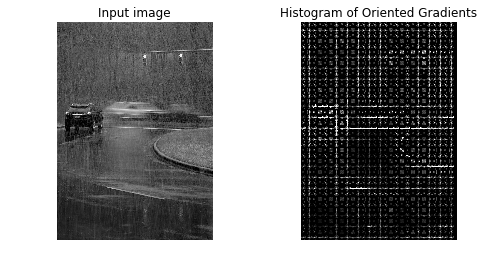

In [10]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure, io

data = io.imread('C:/Users/Paul/Desktop/SS2017/SMBAD/testimages/test-rain.jpg')
image = color.rgb2gray(data)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()